In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import splitfolders
import tensorflow as tf
import os

from keras_preprocessing.image import ImageDataGenerator

In [2]:
dataset_dir = r'D:\Semester 5\Kecerdasan Buatan\Praktikum\Cat-vs-Dog\dataset\Dog and Cat .png'

In [3]:
splitfolders.ratio(dataset_dir, output="dataset-split", ratio=(0.8,0.1,0.1))

In [4]:
train_dir = r'dataset-split\train'
test_dir = r'dataset-split\test'
val_dir = r'dataset-split\val'

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,    
    )

val_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(250, 250),
    classes=['Cat','Dog'],
    class_mode='categorical',
    subset='training'
    )

val_generator =  val_datagen.flow_from_directory(
    val_dir, 
    target_size=(250,250), 
    classes=['Cat','Dog'],
    class_mode='categorical',
    )

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(250,250), 
    classes=['Cat','Dog'],        
    class_mode='categorical', 
    shuffle=False
)


Found 800 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [6]:
img, label = val_generator.next()

labels = ['Cat','Dog']

In [7]:
label

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

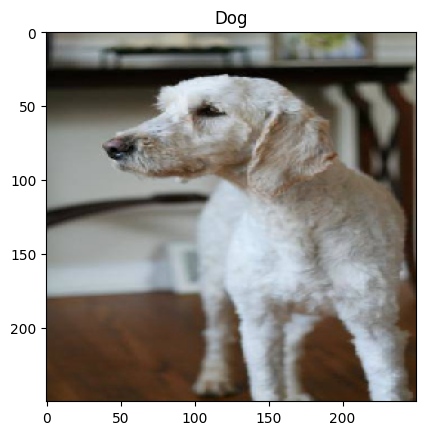

In [8]:
x = 6
plt.title(labels[tf.argmax(label[x])])
plt.imshow(img[x])

In [13]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (5,5), activation ='relu', input_shape = (250,250,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = "relu"),
    tf.keras.layers.Dense(2, activation = "softmax"),
])

# model.add(Dropout(0.25))

# #
# model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.3))

# #
# model.add(Conv2D(filters = 64, kernel_size = (2,2),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.3))

# # 
# model.add(Flatten())
# model.add(Dense(96, activation = "relu"))
# model.add(Dropout(0.25))
# model.add(Dense(2, activation = "softmax"))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 246, 246, 32)      2432      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 123, 123, 32)     0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 484128)            0         
                                                                 
 dense_2 (Dense)             (None, 64)                30984256  
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 30,986,818
Trainable params: 30,986,818
Non-trainable params: 0
__________________________________________

In [15]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001) , loss = "categorical_crossentropy", metrics=["accuracy"])

In [16]:
hasil = model.fit(
    train_generator, 
    epochs = 50,    
    validation_data=val_generator,
    )

Epoch 1/50
25/25 [==============================] - 22s 800ms/step - loss: 7.1702 - accuracy: 0.5038 - val_loss: 0.6826 - val_accuracy: 0.6100
Epoch 2/50
25/25 [==============================] - 20s 783ms/step - loss: 0.6659 - accuracy: 0.6413 - val_loss: 0.6742 - val_accuracy: 0.6700
Epoch 3/50
25/25 [==============================] - 21s 852ms/step - loss: 0.5946 - accuracy: 0.7237 - val_loss: 0.6313 - val_accuracy: 0.6300
Epoch 4/50
25/25 [==============================] - 21s 818ms/step - loss: 0.4797 - accuracy: 0.8050 - val_loss: 0.5764 - val_accuracy: 0.6800
Epoch 5/50
25/25 [==============================] - 21s 834ms/step - loss: 0.3601 - accuracy: 0.8550 - val_loss: 0.6443 - val_accuracy: 0.6500
Epoch 6/50
25/25 [==============================] - 21s 852ms/step - loss: 0.2663 - accuracy: 0.9062 - val_loss: 0.6482 - val_accuracy: 0.6200
Epoch 7/50
25/25 [==============================] - 20s 791ms/step - loss: 0.1754 - accuracy: 0.9513 - val_loss: 0.8529 - val_accuracy: 0.6200

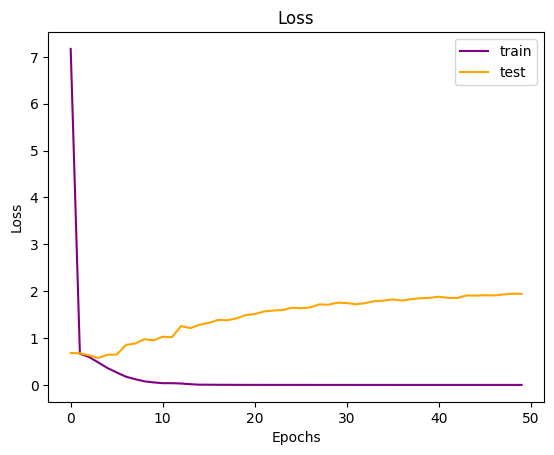

In [17]:
plt.plot(hasil.history["loss"],c = "purple")
plt.plot(hasil.history["val_loss"],c = "orange")
plt.title("Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

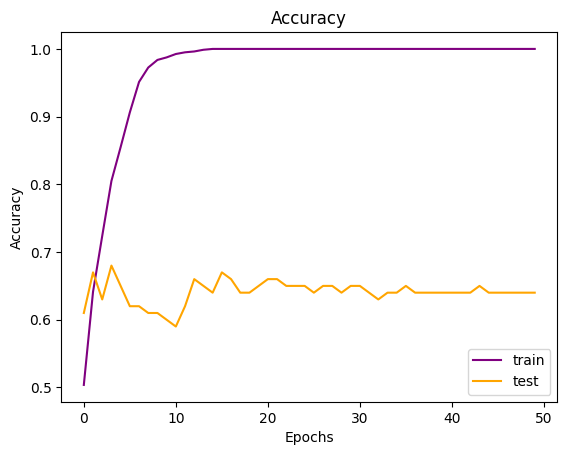

In [18]:
plt.plot(hasil.history["accuracy"],c = "purple")
plt.plot(hasil.history["val_accuracy"],c = "orange")
plt.title("Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "test"])
plt.show()

In [19]:
print("Akurasi          :", hasil.history["accuracy"][-1] * 100, "%")
print("Akurasi validasi :", hasil.history["val_accuracy"][-1] * 100, "%")

Akurasi          : 100.0 %
Akurasi validasi : 63.999998569488525 %
